In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [34]:
def gate(x):
    return math.exp(-x**2)
    # return 1/(1+abs(x))

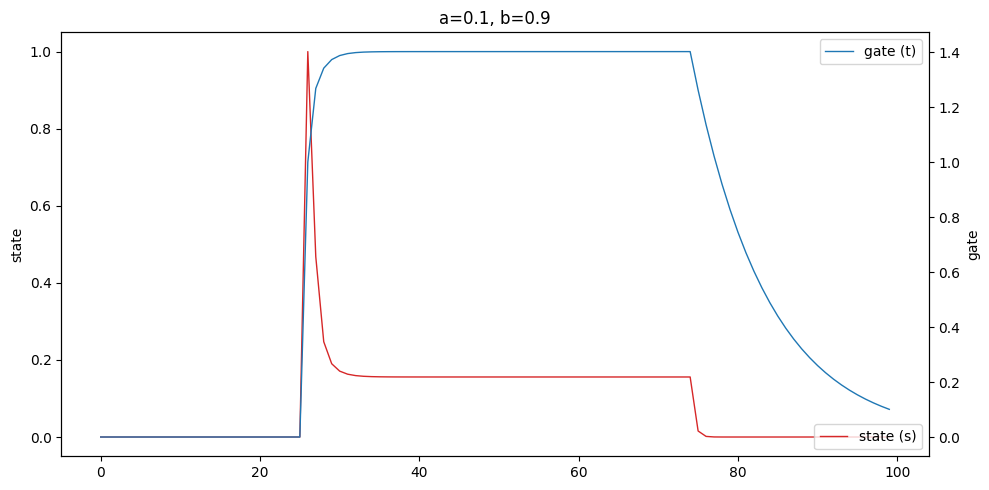

In [65]:
s = 0
t = 0

a = 0.1
b = 0.9

x = 0
u = 0

n = 100

S = []
T = []

for i in range(n):
    # x = 1

    # if i == n//4:
    #     x = 1
    # else:
    #     x = 0

    if i > n//4 and i < 3*n//4:
        x = 1
    else:
        x = 0

    # if i % 5 == 0:
    #     x = 1
    # else:
    #     x = 0

    # x = math.sin(0.1*i)

    u = gate(t) * x
    s = a * s + u
    t = b * t + u

    S.append(s)
    T.append(t)

fig, axis = plt.subplots(1, 1)
twin_axis = axis.twinx()

fig.set_figwidth(10)
fig.set_figheight(5)
fig.set_dpi(100)

# axis.plot(range(n), 1*np.sin(0.1*np.array(range(n))), lw=0.25, ls='-', c='black')
axis.plot(range(n), S, lw=1, ls='-', c='tab:red', label='state (s)')
twin_axis.plot(range(n), T, lw=1, ls='-', c='tab:blue', label='gate (t)')

axis.set_ylabel('state')
twin_axis.set_ylabel('gate')

axis.set_title(f"a={a}, b={b}")

axis.legend(loc='lower right')
twin_axis.legend(loc='upper right')

plt.tight_layout()
plt.show()

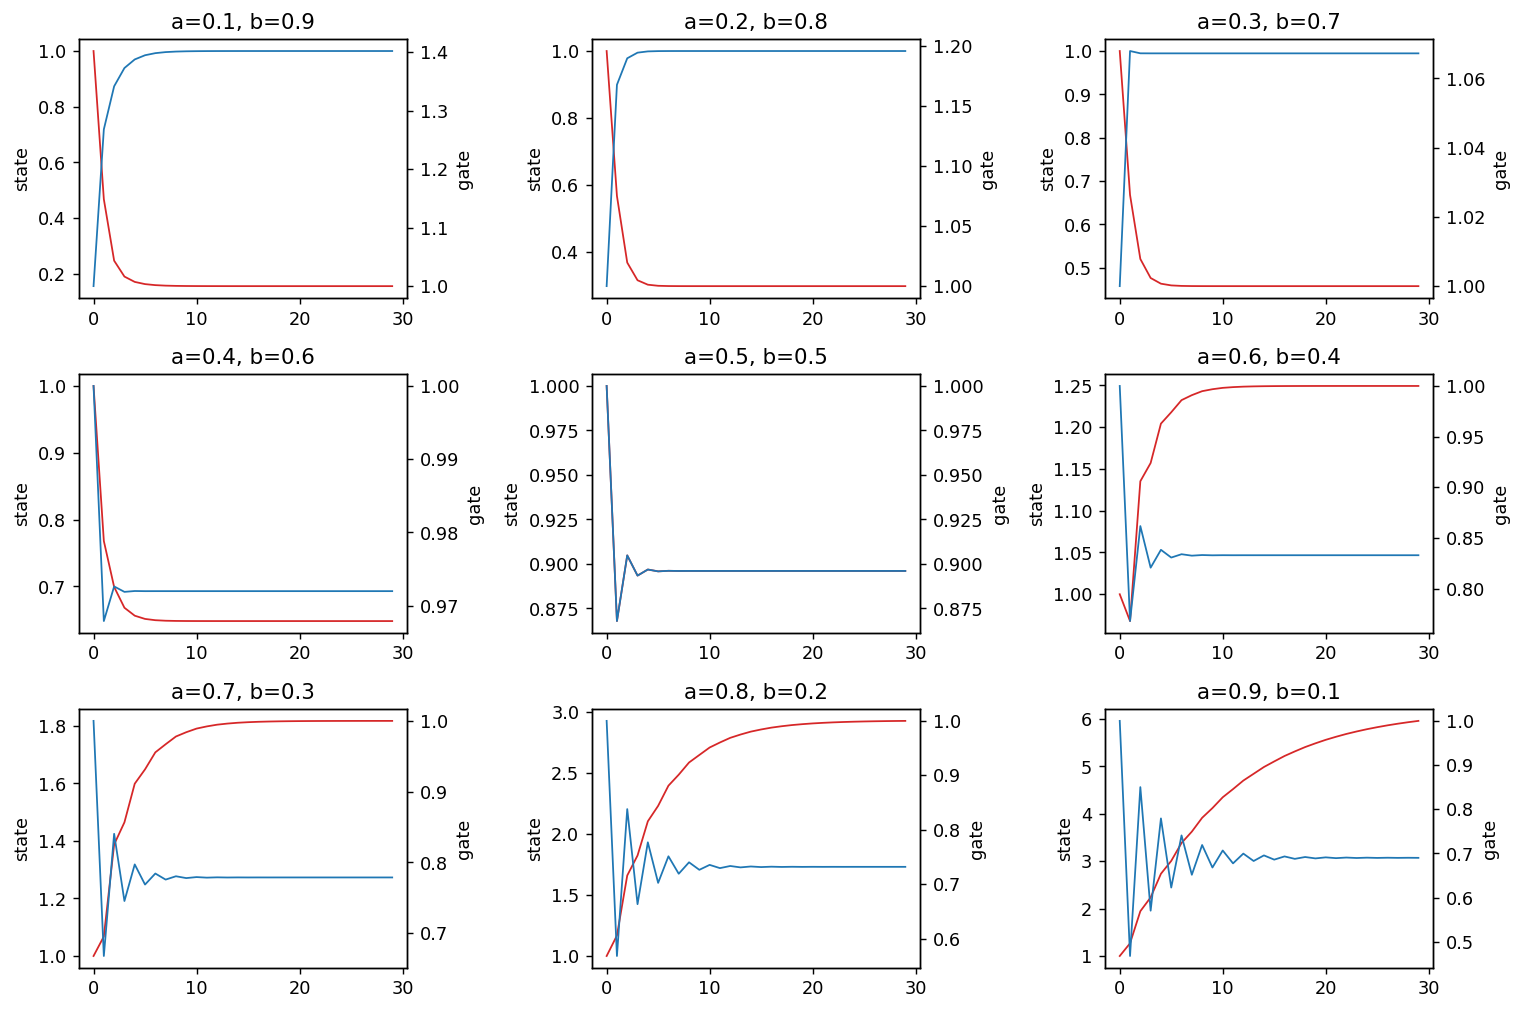

In [4]:
s = 0
t = 0

x = 1
u = 0

a = np.arange(0.1, 1, 0.1)
# b = np.full((9,), 0.1)
b = np.arange(0.9, 0, -0.1)

# a = np.full((9,), 0.01)
# b = np.arange(0.1, 1, 0.1)

n = 30

S = []
T = []

curr_s = []
curr_t = []

for i in range(9):
    curr_s.clear()
    curr_t.clear()

    s = 0
    t = 0

    for j in range(n):
        u = gate(t) * x
        s = a[i] * s + u
        t = b[i] * t + u

        curr_s.append(s)
        curr_t.append(t)
    
    S.append(curr_s.copy())
    T.append(curr_t.copy())
    
fig, axes = plt.subplots(3, 3)
fig.set_figwidth(12)
fig.set_figheight(8)
fig.set_dpi(128)

for i, (ax, si, ti) in enumerate(zip(axes.ravel(), S, T)):
    twin_ax = ax.twinx()

    twin_ax.plot(range(n), ti, lw=1, ls='-', c='tab:blue')
    ax.plot(range(n), si, lw=1, ls='-', c='tab:red')

    ax.set_title(f"a={round(a[i], 2)}, b={round(b[i], 2)}")

    twin_ax.set_ylabel('gate')
    ax.set_ylabel('state')

plt.tight_layout()
plt.show()